# Prelimary

In [212]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [213]:
def huckel_energy(matrix):
  """
  Get energy from Huckel matrix. Diagonalizes matrix, sums eigenvalues and
  returns the total energy.
  """
  topology = np.array(matrix)
  eigenvalues,eigenvectors=np.linalg.eig(topology)
  idx = eigenvalues.argsort()[::-1]   
  eigenvalues = eigenvalues[idx]
  return eigenvalues, eigenvectors

# HMO $\Delta E$ for linear portion of dyes

## Analytical

Bahnick defined the HOMO-LUMO gap for a linear polyene as

$\Delta E = -4 \beta \sin{\frac{\pi}{2(n + 1)}}$

Where $n$ is the number of conjugated atoms in the chain. This equation comes directly from the Huckel Model. For molecular orbita $k$, the energy $E_k$ can be found by

$E_k = \alpha + 2 \beta \cos{\frac{(k+1)\pi}{n + 1}}$

Where $k = 0,1,...,N-1$. Therefore, if the HOMO-LUMO gap is the difference between the $k$ and $k+1$ MO, $\Delta E$ would be

$E_{k+1} - E_k = \Delta E = \left( \alpha + 2 \beta \cos{\frac{(k+2)\pi}{N + 1}} \right) - \left( \alpha + 2 \beta \cos{\frac{(k+1)\pi}{n + 1}} \right)$

When $k = \frac{n}{2}$

$\Delta E = -4 \beta \sin{\frac{\pi}{2(n + 1)}}$

Ref: Quantum Mechanics for Organic Chemists. Zimmerman, H., Academic Press, New York, 1975.

In [214]:
# See equation 1 from poster
def dE_paper(x, b):
  return -4 * b * np.sin(np.pi / (2 * (x + 1)))

In [215]:
# X is the number of conjugated atoms, so carbons + nitrogens
xdata = np.array([5, 7, 9, 9, 11, 13])
# The experimental wavelength in nm
lambdas = np.array([523.0, 604.0, 589.5, 706.0, 706.0, 814.0]) 
# convert to energy, J/molecule
lambdas = lambdas * 10**-9 # wavelength in meters
ydata = 6.626e-34 * 2.99e8 / lambdas # convert to joules

In [216]:
# Fit equation to experimental data
parameters, covariance = curve_fit(dE_paper, xdata, ydata)
# Extract beta
beta = parameters[0] / 4184 * 6.02e23 # convert from joules to kcal/mol
print("Beta is {:.3f} kcal/mol or {:.3f} eV".format(beta, parameters[0] * 6.242e+18))

Beta is -63.173 kcal/mol or -2.741 eV


In [217]:
# Define beta in eV for following code
b = -2.741 # eV

## Numerical

### Matrices

In [218]:
# p3 linear
matrix_p3_linear = np.zeros((5,5))

In [219]:
# Atom 0 interactions (Nitrogen)
matrix_p3_linear[0][1] = b

# Atom 1 interations
matrix_p3_linear[1][0] = b
matrix_p3_linear[1][2] = b

# Atom 2 interactions
matrix_p3_linear[2][1] = b
matrix_p3_linear[2][3] = b

# Atom 3 interactions
matrix_p3_linear[3][2] = b
matrix_p3_linear[3][4] = b

# Atom 4 interactions (Nitrogen)
matrix_p3_linear[4][3] = b

In [220]:
# p5 linear
matrix_p5_linear = np.zeros((7,7))

In [221]:
# Atom 0 interactions (Nitrogen)
matrix_p5_linear[0][1] = b

# Atom 1 interations
matrix_p5_linear[1][0] = b
matrix_p5_linear[1][2] = b

# Atom 2 interactions
matrix_p5_linear[2][1] = b
matrix_p5_linear[2][3] = b

# Atom 3 interactions
matrix_p5_linear[3][2] = b
matrix_p5_linear[3][4] = b

# Atom 4 interactions
matrix_p5_linear[4][3] = b
matrix_p5_linear[4][5] = b

# Atom 5 interactions
matrix_p5_linear[5][4] = b
matrix_p5_linear[5][6] = b

# Atom 5 interactions (Nitrogen)
matrix_p5_linear[6][5] = b

In [222]:
# p7 linear (and q7)
matrix_p7_linear = np.zeros((9,9))

In [223]:
# Atom 0 interactions (Nitrogen)
matrix_p7_linear[0][1] = b

# Atom 1 interations
matrix_p7_linear[1][0] = b
matrix_p7_linear[1][2] = b

# Atom 2 interactions
matrix_p7_linear[2][1] = b
matrix_p7_linear[2][3] = b

# Atom 3 interactions
matrix_p7_linear[3][2] = b
matrix_p7_linear[3][4] = b

# Atom 4 interactions
matrix_p7_linear[4][3] = b
matrix_p7_linear[4][5] = b

# Atom 5 interactions
matrix_p7_linear[5][4] = b
matrix_p7_linear[5][6] = b

# Atom 6 interactions
matrix_p7_linear[6][5] = b
matrix_p7_linear[6][7] = b

# Atom 7 interactions
matrix_p7_linear[7][6] = b
matrix_p7_linear[7][8] = b

# Atom 8 interactions (Nitrogen)
matrix_p7_linear[8][7] = b

In [224]:
# q9 linear
matrix_q9_linear = np.zeros((11,11))

In [225]:
# Atom 0 interactions (Nitrogen)
matrix_q9_linear[0][1] = b

# Atom 1 interations
matrix_q9_linear[1][0] = b
matrix_q9_linear[1][2] = b

# Atom 2 interactions
matrix_q9_linear[2][1] = b
matrix_q9_linear[2][3] = b

# Atom 3 interactions
matrix_q9_linear[3][2] = b
matrix_q9_linear[3][4] = b

# Atom 4 interactions
matrix_q9_linear[4][3] = b
matrix_q9_linear[4][5] = b

# Atom 5 interactions
matrix_q9_linear[5][4] = b
matrix_q9_linear[5][6] = b

# Atom 6 interactions
matrix_q9_linear[6][5] = b
matrix_q9_linear[6][7] = b

# Atom 7 interactions
matrix_q9_linear[7][6] = b
matrix_q9_linear[7][8] = b

# Atom 8 interactions 
matrix_q9_linear[8][7] = b
matrix_q9_linear[8][9] = b

# Atom 9 interactions
matrix_q9_linear[9][8] = b
matrix_q9_linear[9][10] = b

# Atom 10 interactions (Nitrogen)
matrix_q9_linear[10][9] = b

In [226]:
# q11 linear
matrix_q11_linear = np.zeros((13,13))

In [227]:
# Atom 0 interactions (Nitrogen)
matrix_q11_linear[0][1] = b

# Atom 1 interations
matrix_q11_linear[1][0] = b
matrix_q11_linear[1][2] = b

# Atom 2 interactions
matrix_q11_linear[2][1] = b
matrix_q11_linear[2][3] = b

# Atom 3 interactions
matrix_q11_linear[3][2] = b
matrix_q11_linear[3][4] = b

# Atom 4 interactions
matrix_q11_linear[4][3] = b
matrix_q11_linear[4][5] = b

# Atom 5 interactions
matrix_q11_linear[5][4] = b
matrix_q11_linear[5][6] = b

# Atom 6 interactions
matrix_q11_linear[6][5] = b
matrix_q11_linear[6][7] = b

# Atom 7 interactions
matrix_q11_linear[7][6] = b
matrix_q11_linear[7][8] = b

# Atom 8 interactions 
matrix_q11_linear[8][7] = b
matrix_q11_linear[8][9] = b

# Atom 9 interactions
matrix_q11_linear[9][8] = b
matrix_q11_linear[9][10] = b

# Atom 10 interactions
matrix_q11_linear[10][9] = b
matrix_q11_linear[10][11] = b

# Atom 11 interactions
matrix_q11_linear[11][10] = b
matrix_q11_linear[11][12] = b

# Atom 12 interactions (Nitrogen)
matrix_q11_linear[12][11] = b

### Calculate $\lambda_{max}$

The HOMO and LUMO were identified by counting the number of $\pi$ electrons in the $\pi$ system, and then filling the MOs accordingly. Or, the HOMO was the N/2 (rounded up) MO, and the LUMO was the N/2 + 1 (rounded up) MO. MO energies are found from the eigenvalues of the diagonlized matrices.

In [228]:
# Linear p3
eigenvalues, eigenvectors = huckel_energy(matrix_p3_linear)
print(eigenvalues)

[ 4.74755126e+00  2.74100000e+00 -3.49388824e-16 -2.74100000e+00
 -4.74755126e+00]


In [229]:
dE_p3_linear = 2.741 / 6.242e+18 # J
lambda_p3_linear = 6.626e-34 * 2.99e8 / dE_p3_linear
print("Lambda max is {:.3f} nm for the linear p3 dye".format(lambda_p3_linear * 10**9))

Lambda max is 451.167 nm for the linear p3 dye


In [230]:
# Linear p5
eigenvalues, eigenvectors = huckel_energy(matrix_p5_linear)
print(eigenvalues)

[ 5.06470760e+00  3.87635937e+00  2.09787058e+00 -3.95680231e-16
 -2.09787058e+00 -3.87635937e+00 -5.06470760e+00]


In [231]:
dE_p5_linear = 2.098 / 6.242e+18 # J
lambda_p5_linear = 6.626e-34 * 2.99e8 / dE_p5_linear
print("Lambda max is {:.3f} nm for the linear p5 dye".format(lambda_p5_linear * 10**9))

Lambda max is 589.442 nm for the linear p5 dye


In [232]:
# Linear p7 (and q7)
eigenvalues, eigenvectors = huckel_energy(matrix_p7_linear)
print(eigenvalues)

[ 5.21369182e+00  4.43503116e+00  3.22223875e+00  1.69403116e+00
  1.38392167e-15 -1.69403116e+00 -3.22223875e+00 -4.43503116e+00
 -5.21369182e+00]


In [233]:
dE_p7_linear = 1.694 / 6.242e+18 # J
lambda_p7_linear = 6.626e-34 * 2.99e8 / dE_p7_linear
print("Lambda max is {:.3f} nm for the linear p7 (and q7) dye".format(lambda_p7_linear * 10**9))

Lambda max is 730.017 nm for the linear p7 (and q7) dye


In [234]:
# Linear q9
eigenvalues, eigenvectors = huckel_energy(matrix_q9_linear)
print(eigenvalues)

[ 5.29520538e+00  4.74755126e+00  3.87635937e+00  2.74100000e+00
  1.41884601e+00 -1.54473785e-16 -1.41884601e+00 -2.74100000e+00
 -3.87635937e+00 -4.74755126e+00 -5.29520538e+00]


In [235]:
dE_q9_linear = 1.419 / 6.242e+18 # J
lambda_q9_linear = 6.626e-34 * 2.99e8 / dE_q9_linear
print("Lambda max is {:.3f} nm for the linear q9 dye".format(lambda_q9_linear * 10**9))

Lambda max is 871.493 nm for the linear q9 dye


In [236]:
# Linear q11
eigenvalues, eigenvectors = huckel_energy(matrix_q11_linear)
print(eigenvalues)

[ 5.34455481e+00  4.93911133e+00  4.28600019e+00  3.41797109e+00
  2.37855066e+00  1.21985976e+00  1.98062732e-16 -1.21985976e+00
 -2.37855066e+00 -3.41797109e+00 -4.28600019e+00 -4.93911133e+00
 -5.34455481e+00]


In [237]:
dE_q11_linear = 1.220 / 6.242e+18 # J
lambda_q11_linear = 6.626e-34 * 2.99e8 / dE_q11_linear
print("Lambda max is {:.3f} nm for the linear q11 dye".format(lambda_q11_linear * 10**9))

Lambda max is 1013.647 nm for the linear q11 dye


## Results

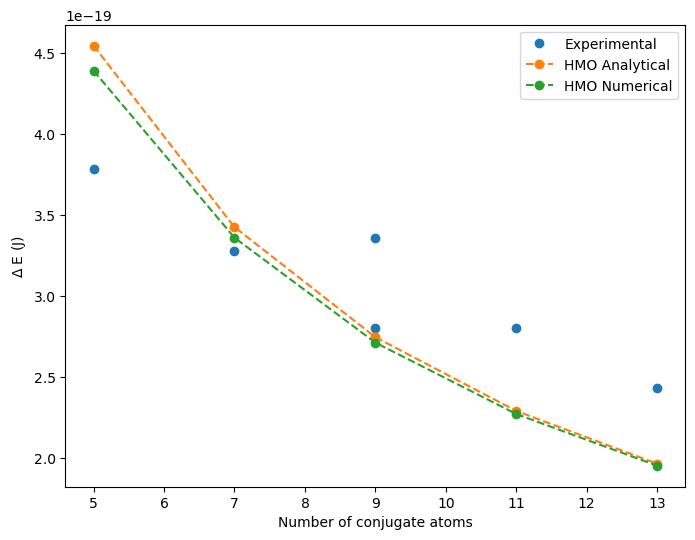

In [238]:
plt.figure(figsize=((8,6)))
parameters, covariance = curve_fit(dE_paper, xdata, ydata)
plt.plot(xdata, ydata, 'o')
plt.plot(xdata, dE_paper(xdata, parameters[0]), '--o')
plt.plot([5,7,9,11,13], [dE_p3_linear, dE_p5_linear, dE_p7_linear, dE_q9_linear, dE_q11_linear], '--o')
plt.xlabel("Number of conjugate atoms")
plt.ylabel("$\Delta$ E (J)")
plt.legend(["Experimental", "HMO Analytical", "HMO Numerical"])
plt.show()

__Figure 1__. HOMO-LUMO gap for polymethine dyes. The analytical and numerical approaches are very close in their predictions, and both fail to predict shift in ΔE for Q dyes.

# HMO for whole dye molecules

## Matrices

In [239]:
# Huckel matrix for dye P3
matrix_p3 = np.zeros((21, 21))

In [240]:
# Ring 1
# Atom 0 interaction (Nitrogen)
matrix_p3[0][9] = b
matrix_p3[0][1] = b

# Atom 1 interactions
matrix_p3[1][0] = b
matrix_p3[1][2] = b
matrix_p3[1][6] = b

# Atom 2 interactions
matrix_p3[2][1] = b
matrix_p3[2][3] = b

# Atom 3 interactions
matrix_p3[3][2] = b
matrix_p3[3][4] = b

# Atom 4 interactions
matrix_p3[4][3] = b
matrix_p3[4][5] = b

# Atom 5 interactions
matrix_p3[5][4] = b
matrix_p3[5][6] = b

# Atom 6 interactions
matrix_p3[6][1] = b
matrix_p3[6][5] = b
matrix_p3[6][7] = b

# Atom 7 interaction
matrix_p3[7][6] = b
matrix_p3[7][8] = b

# Atom 8 interaction
matrix_p3[8][7] = b
matrix_p3[8][9] = b

# Atom 9 interaction
matrix_p3[9][0] = b
matrix_p3[9][8] = b
# Change with different path length
matrix_p3[9][20]

#  Ring 2
# Atom 10 interaction (Nitrogen)
matrix_p3[10][11] = b
matrix_p3[10][19] = b

# Atom 11 interactions
matrix_p3[11][10] = b
matrix_p3[11][12] = b
matrix_p3[11][16] = b

# Atom 12 interactions
matrix_p3[12][11] = b
matrix_p3[12][13] = b

# Atom 13 interactions
matrix_p3[13][12] = b
matrix_p3[13][14] = b

# Atom 14 interactions
matrix_p3[14][13] = b
matrix_p3[14][15] = b

# Atom 15 interactions
matrix_p3[15][14] = b
matrix_p3[15][16] = b

# Atom 16 interactions
matrix_p3[16][11] = b
matrix_p3[16][15] = b
matrix_p3[16][17] = b

# Atom 17 interaction
matrix_p3[17][16] = b
matrix_p3[17][18] = b

# Atom 18 interaction
matrix_p3[18][17] = b
matrix_p3[18][19] = b

# Atom 19 interaction
matrix_p3[19][10] = b
matrix_p3[19][18] = b
# Change with different path length
matrix_p3[19][20]

# Atoms in chain
# Atom 20 interactions
matrix_p3[20][9] = b
matrix_p3[20][19] = b

# print(matrix_p3)

In [241]:
# Huckel matrix for dye P5
matrix_p5 = np.zeros((23, 23))

In [242]:
# Ring 1
# Atom 0 interaction (Nitrogen)
matrix_p5[0][9] = b
matrix_p5[0][1] = b

# Atom 1 interactions
matrix_p5[1][0] = b
matrix_p5[1][2] = b
matrix_p5[1][6] = b

# Atom 2 interactions
matrix_p5[2][1] = b
matrix_p5[2][3] = b

# Atom 3 interactions
matrix_p5[3][2] = b
matrix_p5[3][4] = b

# Atom 4 interactions
matrix_p5[4][3] = b
matrix_p5[4][5] = b

# Atom 5 interactions
matrix_p5[5][4] = b
matrix_p5[5][6] = b

# Atom 6 interactions
matrix_p5[6][1] = b
matrix_p5[6][5] = b
matrix_p5[6][7] = b

# Atom 7 interaction
matrix_p5[7][6] = b
matrix_p5[7][8] = b

# Atom 8 interaction
matrix_p5[8][7] = b
matrix_p5[8][9] = b

# Atom 9 interaction
matrix_p5[9][0] = b
matrix_p5[9][8] = b
# Change with different path length
matrix_p5[9][20]

#  Ring 2
# Atom 10 interaction (Nitrogen)
matrix_p5[10][11] = b
matrix_p5[10][19] = b

# Atom 11 interactions
matrix_p5[11][10] = b
matrix_p5[11][12] = b
matrix_p5[11][16] = b

# Atom 12 interactions
matrix_p5[12][11] = b
matrix_p5[12][13] = b

# Atom 13 interactions
matrix_p5[13][12] = b
matrix_p5[13][14] = b

# Atom 14 interactions
matrix_p5[14][13] = b
matrix_p5[14][15] = b

# Atom 15 interactions
matrix_p5[15][14] = b
matrix_p5[15][16] = b

# Atom 16 interactions
matrix_p5[16][11] = b
matrix_p5[16][15] = b
matrix_p5[16][17] = b

# Atom 17 interaction
matrix_p5[17][16] = b
matrix_p5[17][18] = b

# Atom 18 interaction
matrix_p5[18][17] = b
matrix_p5[18][19] = b

# Atom 19 interaction
matrix_p5[19][10] = b
matrix_p5[19][18] = b
# Change with different path length
matrix_p5[19][22]

# Atoms in chain
# Atom 20 interactions
matrix_p5[20][9] = b
matrix_p5[20][21] = b

# Atom 21 interations
matrix_p5[21][20] = b
matrix_p5[21][22] = b

# Atom 22 interactions
matrix_p5[22][19] = b
matrix_p5[22][21] = b

# print(matrix_p5)

In [243]:
# Huckel matrix for dye P7
matrix_p7 = np.zeros((25, 25))

In [244]:
# Ring 1
# Atom 0 interaction (Nitrogen)
matrix_p7[0][9] = b
matrix_p7[0][1] = b
# Atom 1 interactions
matrix_p7[1][0] = b
matrix_p7[1][2] = b
matrix_p7[1][6] = b

# Atom 2 interactions
matrix_p7[2][1] = b
matrix_p7[2][3] = b

# Atom 3 interactions
matrix_p7[3][2] = b
matrix_p7[3][4] = b

# Atom 4 interactions
matrix_p7[4][3] = b
matrix_p7[4][5] = b

# Atom 5 interactions
matrix_p7[5][4] = b
matrix_p7[5][6] = b

# Atom 6 interactions
matrix_p7[6][1] = b
matrix_p7[6][5] = b
matrix_p7[6][7] = b

# Atom 7 interaction
matrix_p7[7][6] = b
matrix_p7[7][8] = b

# Atom 8 interaction
matrix_p7[8][7] = b
matrix_p7[8][9] = b

# Atom 9 interaction
matrix_p7[9][0] = b
matrix_p7[9][8] = b
# Change with different path length
matrix_p7[9][20]

#  Ring 2
# Atom 10 interaction (Nitrogen)
matrix_p7[10][11] = b
matrix_p7[10][19] = b

# Atom 11 interactions
matrix_p7[11][10] = b
matrix_p7[11][12] = b
matrix_p7[11][16] = b

# Atom 12 interactions
matrix_p7[12][11] = b
matrix_p7[12][13] = b

# Atom 13 interactions
matrix_p7[13][12] = b
matrix_p7[13][14] = b

# Atom 14 interactions
matrix_p7[14][13] = b
matrix_p7[14][15] = b

# Atom 15 interactions
matrix_p7[15][14] = b
matrix_p7[15][16] = b

# Atom 16 interactions
matrix_p7[16][11] = b
matrix_p7[16][15] = b
matrix_p7[16][17] = b

# Atom 17 interaction
matrix_p7[17][16] = b
matrix_p7[17][18] = b

# Atom 18 interaction
matrix_p7[18][17] = b
matrix_p7[18][19] = b

# Atom 19 interaction
matrix_p7[19][10] = b
matrix_p7[19][18] = b
# Change with different path length
matrix_p7[19][24]

# Atoms in chain
# Atom 20 interactions
matrix_p7[20][9] = b
matrix_p7[20][21] = b

# Atom 21 interations
matrix_p7[21][20] = b
matrix_p7[21][22] = b

# Atom 22 interactions
matrix_p7[22][21] = b
matrix_p7[22][23] = b

# Atom 23 interactions
matrix_p7[23][22] = b
matrix_p7[23][24] = b

# Atom 24 interactions
matrix_p7[24][23] = b
matrix_p7[24][19] = b

#print(matrix_p7)

In [245]:
# Huckel matrix for dye q7
matrix_q7 = np.zeros((21, 21))

In [246]:
# Ring 1
# Atom 0 interaction (Nitrogen)
matrix_q7[0][9] = b
matrix_q7[0][1] = b

# Atom 1 interactions
matrix_q7[1][0] = b
matrix_q7[1][2] = b
matrix_q7[1][6] = b

# Atom 2 interactions
matrix_q7[2][1] = b
matrix_q7[2][3] = b

# Atom 3 interactions
matrix_q7[3][2] = b
matrix_q7[3][4] = b

# Atom 4 interactions
matrix_q7[4][3] = b
matrix_q7[4][5] = b

# Atom 5 interactions
matrix_q7[5][4] = b
matrix_q7[5][6] = b

# Atom 6 interactions
matrix_q7[6][1] = b
matrix_q7[6][5] = b
matrix_q7[6][7] = b

# Atom 7 interaction
matrix_q7[7][6] = b
matrix_q7[7][8] = b
# Change with different path length
matrix_q7[7][20]

# Atom 8 interaction
matrix_q7[8][7] = b
matrix_q7[8][9] = b

# Atom 9 interaction
matrix_q7[9][0] = b
matrix_q7[9][8] = b

#  Ring 2
# Atom 10 interaction (Nitrogen)
matrix_q7[10][11] = b
matrix_q7[10][19] = b

# Atom 11 interactions
matrix_q7[11][10] = b
matrix_q7[11][12] = b
matrix_q7[11][16] = b

# Atom 12 interactions
matrix_q7[12][11] = b
matrix_q7[12][13] = b

# Atom 13 interactions
matrix_q7[13][12] = b
matrix_q7[13][14] = b

# Atom 14 interactions
matrix_q7[14][13] = b
matrix_q7[14][15] = b

# Atom 15 interactions
matrix_q7[15][14] = b
matrix_q7[15][16] = b

# Atom 16 interactions
matrix_q7[16][11] = b
matrix_q7[16][15] = b
matrix_q7[16][17] = b

# Atom 17 interaction
matrix_q7[17][16] = b
matrix_q7[17][18] = b
# Change with different path length
matrix_q7[17][20]

# Atom 18 interaction
matrix_q7[18][17] = b
matrix_q7[18][19] = b

# Atom 19 interaction
matrix_q7[19][10] = b
matrix_q7[19][18] = b

# Atoms in chain
# Atom 20 interactions
matrix_q7[20][7] = b
matrix_q7[20][17] = b

# print(matrix_q7)

In [247]:
# Huckel matrix for dye q9
matrix_q9 = np.zeros((23, 23))

In [248]:
# Ring 1
# Atom 0 interaction (Nitrogen)
matrix_q9[0][9] = b
matrix_q9[0][1] = b

# Atom 1 interactions
matrix_q9[1][0] = b
matrix_q9[1][2] = b
matrix_q9[1][6] = b

# Atom 2 interactions
matrix_q9[2][1] = b
matrix_q9[2][3] = b

# Atom 3 interactions
matrix_q9[3][2] = b
matrix_q9[3][4] = b

# Atom 4 interactions
matrix_q9[4][3] = b
matrix_q9[4][5] = b

# Atom 5 interactions
matrix_q9[5][4] = b
matrix_q9[5][6] = b

# Atom 6 interactions
matrix_q9[6][1] = b
matrix_q9[6][5] = b
matrix_q9[6][7] = b

# Atom 7 interaction
matrix_q9[7][6] = b
matrix_q9[7][8] = b
# Change with different path length
matrix_q9[7][20]

# Atom 8 interaction
matrix_q9[8][7] = b
matrix_q9[8][9] = b

# Atom 9 interaction
matrix_q9[9][0] = b
matrix_q9[9][8] = b

#  Ring 2
# Atom 10 interaction (Nitrogen)
matrix_q9[10][11] = b
matrix_q9[10][19] = b

# Atom 11 interactions
matrix_q9[11][10] = b
matrix_q9[11][12] = b
matrix_q9[11][16] = b

# Atom 12 interactions
matrix_q9[12][11] = b
matrix_q9[12][13] = b

# Atom 13 interactions
matrix_q9[13][12] = b
matrix_q9[13][14] = b

# Atom 14 interactions
matrix_q9[14][13] = b
matrix_q9[14][15] = b

# Atom 15 interactions
matrix_q9[15][14] = b
matrix_q9[15][16] = b

# Atom 16 interactions
matrix_q9[16][11] = b
matrix_q9[16][15] = b
matrix_q9[16][17] = b

# Atom 17 interaction
matrix_q9[17][16] = b
matrix_q9[17][18] = b
# Change with different path length
matrix_q9[17][22]

# Atom 18 interaction
matrix_q9[18][17] = b
matrix_q9[18][19] = b

# Atom 19 interaction
matrix_q9[19][10] = b
matrix_q9[19][18] = b

# Atoms in chain
# Atom 20 interactions
matrix_q9[20][7] = b
matrix_q9[20][21] = b

# Atom 21 interactions
matrix_q9[21][20] = b
matrix_q9[21][22] = b

# Atom 22 interactions
matrix_q9[22][17] = b
matrix_q9[22][21] = b

# print(matrix_q9)

In [249]:
# Huckel matrix for dye q11
matrix_q11 = np.zeros((25, 25))

In [250]:
# Ring 1
# Atom 0 interaction (Nitrogen)
matrix_q11[0][9] = b
matrix_q11[0][1] = b

# Atom 1 interactions
matrix_q11[1][0] = b
matrix_q11[1][2] = b
matrix_q11[1][6] = b

# Atom 2 interactions
matrix_q11[2][1] = b
matrix_q11[2][3] = b

# Atom 3 interactions
matrix_q11[3][2] = b
matrix_q11[3][4] = b

# Atom 4 interactions
matrix_q11[4][3] = b
matrix_q11[4][5] = b

# Atom 5 interactions
matrix_q11[5][4] = b
matrix_q11[5][6] = b

# Atom 6 interactions
matrix_q11[6][1] = b
matrix_q11[6][5] = b
matrix_q11[6][7] = b

# Atom 7 interaction
matrix_q11[7][6] = b
matrix_q11[7][8] = b
# Change with different path length
matrix_q11[7][20]

# Atom 8 interaction
matrix_q11[8][7] = b
matrix_q11[8][9] = b

# Atom 9 interaction
matrix_q11[9][0] = b
matrix_q11[9][8] = b

#  Ring 2
# Atom 10 interaction (Nitrogen)
matrix_q11[10][11] = b
matrix_q11[10][19] = b

# Atom 11 interactions
matrix_q11[11][10] = b
matrix_q11[11][12] = b
matrix_q11[11][16] = b

# Atom 12 interactions
matrix_q11[12][11] = b
matrix_q11[12][13] = b

# Atom 13 interactions
matrix_q11[13][12] = b
matrix_q11[13][14] = b

# Atom 14 interactions
matrix_q11[14][13] = b
matrix_q11[14][15] = b

# Atom 15 interactions
matrix_q11[15][14] = b
matrix_q11[15][16] = b

# Atom 16 interactions
matrix_q11[16][11] = b
matrix_q11[16][15] = b
matrix_q11[16][17] = b

# Atom 17 interaction
matrix_q11[17][16] = b
matrix_q11[17][18] = b
# Change with different path length
matrix_q11[17][24]

# Atom 18 interaction
matrix_q11[18][17] = b
matrix_q11[18][19] = b

# Atom 19 interaction
matrix_q11[19][10] = b
matrix_q11[19][18] = b

# Atoms in chain
# Atom 20 interactions
matrix_q11[20][7] = b
matrix_q11[20][21] = b

# Atom 21 interactions
matrix_q11[21][20] = b
matrix_q11[21][22] = b

# Atom 22 interactions
matrix_q11[22][21] = b
matrix_q11[22][23] = b

# Atom 23 interactions
matrix_q11[23][22] = b
matrix_q11[23][24] = b

# Atom 24 interactions
matrix_q11[24][17] = b
matrix_q11[24][23] = b

# print(matrix_q11)

## Lambdas

In [251]:
# p3
eigenvalues, eigenvectors = huckel_energy(matrix_p3)
print(eigenvalues)

[ 6.31190802  6.31190802  4.43503116  4.43503116  3.57090802  3.57090802
  2.741       2.741       1.69403116  1.69403116  0.         -1.69403116
 -1.69403116 -2.741      -2.741      -3.57090802 -3.57090802 -4.43503116
 -4.43503116 -6.31190802 -6.31190802]


In [252]:
dE_p3 = 1.69403116 / 6.242e+18 # J
lambda_p3 = 6.626e-34 * 2.99e8 / dE_p3
print("Full Huckel Model (all carbon) lambda max for p3 is {:.3f} nm".format(lambda_p3 * 10**9))

Full Huckel Model (all carbon) lambda max for p3 is 730.004 nm


In [253]:
# p5
eigenvalues, eigenvectors = huckel_energy(matrix_p5)
print(eigenvalues)

[ 6.31190802e+00  6.31190802e+00  4.43503116e+00  4.43503116e+00
  3.87635937e+00  3.57090802e+00  3.57090802e+00  2.74100000e+00
  2.74100000e+00  1.69403116e+00  1.69403116e+00 -7.35704839e-16
 -1.69403116e+00 -1.69403116e+00 -2.74100000e+00 -2.74100000e+00
 -3.57090802e+00 -3.57090802e+00 -3.87635937e+00 -4.43503116e+00
 -4.43503116e+00 -6.31190802e+00 -6.31190802e+00]


In [254]:
dE_p5 = 1.69403116 / 6.242e+18 # J
lambda_p5 = 6.626e-34 * 2.99e8 / dE_p5
print("Full Huckel Model (all carbon) lambda max for p5 is {:.3f} nm".format(lambda_p5 * 10**9))

Full Huckel Model (all carbon) lambda max for p5 is 730.004 nm


In [255]:
# p7
eigenvalues, eigenvectors = huckel_energy(matrix_p7)
print(eigenvalues)

[ 6.31190802e+00  6.31190802e+00  4.74755126e+00  4.43503116e+00
  4.43503116e+00  3.57090802e+00  3.57090802e+00  2.74100000e+00
  2.74100000e+00  2.74100000e+00  1.69403116e+00  1.69403116e+00
 -2.60147496e-16 -1.69403116e+00 -1.69403116e+00 -2.74100000e+00
 -2.74100000e+00 -2.74100000e+00 -3.57090802e+00 -3.57090802e+00
 -4.43503116e+00 -4.43503116e+00 -4.74755126e+00 -6.31190802e+00
 -6.31190802e+00]


In [256]:
dE_p7 = 1.694031161 / 6.242e+18 # J
lambda_p7 = 6.626e-34 * 2.99e8 / dE_p7
print("Full Huckel Model (all carbon) lambda max for p7 is {:.3f} nm".format(lambda_p7 * 10**9))

Full Huckel Model (all carbon) lambda max for p7 is 730.004 nm


In [257]:
# q7
eig, eigenvectors = huckel_energy(matrix_q7)
print(eig)

[ 6.31190802  6.31190802  4.43503116  4.43503116  3.57090802  3.57090802
  2.741       2.741       1.69403116  1.69403116  0.         -1.69403116
 -1.69403116 -2.741      -2.741      -3.57090802 -3.57090802 -4.43503116
 -4.43503116 -6.31190802 -6.31190802]


In [258]:
dE_q7 = 1.69403116 / 6.242e+18 # J
lambda_q7 = 6.626e-34 * 2.99e8 / dE_q7
print("Full Huckel Model (all carbon) lambda max for q7 is {:.3f} nm".format(lambda_q7 * 10**9))

Full Huckel Model (all carbon) lambda max for q7 is 730.004 nm


In [259]:
# q9
eig, eigenvectors = huckel_energy(matrix_q9)
print(eig)

[ 6.31190802e+00  6.31190802e+00  4.43503116e+00  4.43503116e+00
  3.87635937e+00  3.57090802e+00  3.57090802e+00  2.74100000e+00
  2.74100000e+00  1.69403116e+00  1.69403116e+00 -1.80800570e-15
 -1.69403116e+00 -1.69403116e+00 -2.74100000e+00 -2.74100000e+00
 -3.57090802e+00 -3.57090802e+00 -3.87635937e+00 -4.43503116e+00
 -4.43503116e+00 -6.31190802e+00 -6.31190802e+00]


In [260]:
dE_q9 = 1.69403116 / 6.242e+18 # J
lambda_q9 = 6.626e-34 * 2.99e8 / dE_q9
print("Full Huckel Model (all carbon) lambda max for q9 is {:.3f} nm".format(lambda_q9 * 10**9))

Full Huckel Model (all carbon) lambda max for q9 is 730.004 nm


In [261]:
# q11
eig, eigenvectors = huckel_energy(matrix_q11)
print(eig)

[ 6.31190802e+00  6.31190802e+00  4.74755126e+00  4.43503116e+00
  4.43503116e+00  3.57090802e+00  3.57090802e+00  2.74100000e+00
  2.74100000e+00  2.74100000e+00  1.69403116e+00  1.69403116e+00
  2.24123320e-15 -1.69403116e+00 -1.69403116e+00 -2.74100000e+00
 -2.74100000e+00 -2.74100000e+00 -3.57090802e+00 -3.57090802e+00
 -4.43503116e+00 -4.43503116e+00 -4.74755126e+00 -6.31190802e+00
 -6.31190802e+00]


In [262]:
dE_q11 = 1.69403116 / 6.242e+18 # J
lambda_q11 = 6.626e-34 * 2.99e8 / dE_q11
print("Full Huckel Model (all carbon) lambda max for q11 is {:.3f} nm".format(lambda_q11 * 10**9))

Full Huckel Model (all carbon) lambda max for q11 is 730.004 nm


Note that for every dye, no matter the chain length between the aromatic end groups HMO theory predicts __identical HOMO-LUMO gaps__.

# Full HMO + adjustment for nitrogen potential

Up until this point, $\beta$ for nitrogen and carbon have been treated the same (essentially we've treated nitrogen as carbon). However, the potential an electron on nitrogen feels is very different than that felt on carbon, due to differences in electronegativity. So, $\beta$ can be adjusted by adding an additional parameter $h$.

In [263]:
h = -100 #arbitrary
matrix_N_p3 = matrix_p3.copy()
matrix_N_p3[0][0] = b * h
matrix_N_p3[10][10] = b * h
eigenvalues, eigenvectors = huckel_energy(matrix_N_p3)
print(eigenvalues)

[ 2.74154817e+02  2.74154817e+02  5.88400929e+00  5.88400929e+00
  4.22858565e+00  4.22858565e+00  2.74100000e+00  2.74100000e+00
  2.73275697e+00  2.73275697e+00  0.00000000e+00 -2.24231496e-02
 -2.24231496e-02 -2.74100000e+00 -2.74100000e+00 -2.74920193e+00
 -2.74920193e+00 -4.23210204e+00 -4.23210204e+00 -5.89644205e+00
 -5.89644205e+00]


In [264]:
dE_p3_N = 2.73275697 / 6.242e+18 # J
lambda_p3_N = 6.626e-34 * 2.99e8 / dE_p3_N
print("Full Huckel Model (all carbon) + adjustment for nitrogen lambda max for p3 is {:.3f} nm".format(lambda_p3_N * 10**9))

Full Huckel Model (all carbon) + adjustment for nitrogen lambda max for p3 is 452.528 nm


This is markedly better than the previous predicition of 730 nm. However, when this same approach is taken for dye p5, we get the same result.

In [265]:
matrix_N_p5 = matrix_p5.copy()
matrix_N_p5[0][0] = b * h
matrix_N_p5[10][10] = b * h
eigenvalues, eigenvectors = huckel_energy(matrix_N_p5)
print(eigenvalues)

[ 2.74154817e+02  2.74154817e+02  5.88400929e+00  5.88400929e+00
  4.22858565e+00  4.22858565e+00  3.87635937e+00  2.74100000e+00
  2.74100000e+00  2.73275697e+00  2.73275697e+00  4.70673082e-14
 -2.24231496e-02 -2.24231496e-02 -2.74100000e+00 -2.74100000e+00
 -2.74920193e+00 -2.74920193e+00 -3.87635937e+00 -4.23210204e+00
 -4.23210204e+00 -5.89644205e+00 -5.89644205e+00]


In [266]:
dE_p5_N = 2.73275697 / 6.242e+18 # J
lambda_p5_N = 6.626e-34 * 2.99e8 / dE_p5_N
print("Full Huckel Model (all carbon) + adjustment for nitrogen lambda max for p5 is {:.3f} nm".format(lambda_p5_N * 10**9))

Full Huckel Model (all carbon) + adjustment for nitrogen lambda max for p5 is 452.528 nm


This is an interesting result. It means that the HOMO-LUMO gap for the dyes is somehow independent of the chain length between the two aromatic end groups.

# Why the same $\Delta E$?

So, why do we get the same $\Delta E$ for all of the dyes? We believe that the major contributor to the HOMO-LUMO energy are the aromatic end groups, and the connecting chain plays a very minor role.

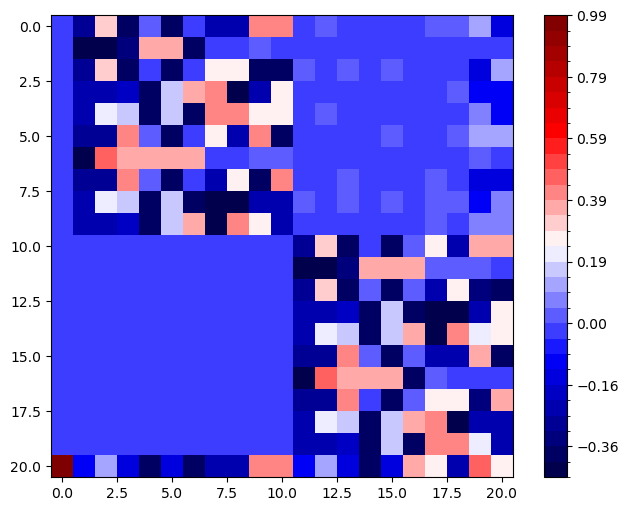

In [267]:
eigenvalues, eigenvectors = huckel_energy(matrix_p3)
plt.figure(figsize=((8,6)))
from matplotlib.colors import BoundaryNorm
bounds = np.arange(np.min(eigenvectors),np.max(eigenvectors),.05)
cmap = plt.get_cmap('seismic')
idx=np.searchsorted(bounds,0)
bounds=np.insert(bounds,idx,0)
norm = BoundaryNorm(bounds, cmap.N)
plt.imshow(eigenvectors,interpolation='none',norm=norm,cmap=cmap)
plt.colorbar()
plt.show()

This figure shows the the sign of the orbitals on each conjugated atom in dye p3. Note on the bottom right the clock of same sign orbitals. This is one of the aromatic end groups. There is a transition in the center (the HOMO-LUMO gap), where the end group that was all in-phase swaps, and the other aromatic end group becomes all in-phase. This indicates that the transition in HOMO-LUMO energy is only related to the aromatic end groups, and is independent of the significanlty smaller center chain.

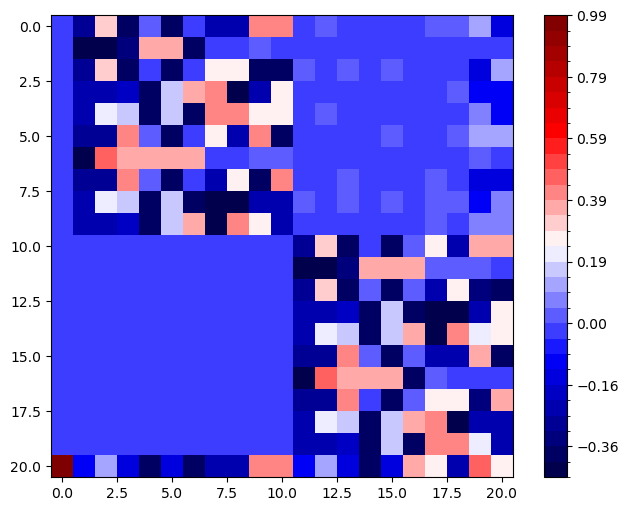

In [268]:
eigenvalues, eigenvectors = huckel_energy(matrix_p3)
plt.figure(figsize=((8,6)))
from matplotlib.colors import BoundaryNorm
bounds = np.arange(np.min(eigenvectors),np.max(eigenvectors),.05)
cmap = plt.get_cmap('seismic')
idx=np.searchsorted(bounds,0)
bounds=np.insert(bounds,idx,0)
norm = BoundaryNorm(bounds, cmap.N)
plt.imshow(eigenvectors,interpolation='none',norm=norm,cmap=cmap)
plt.colorbar()
plt.show()

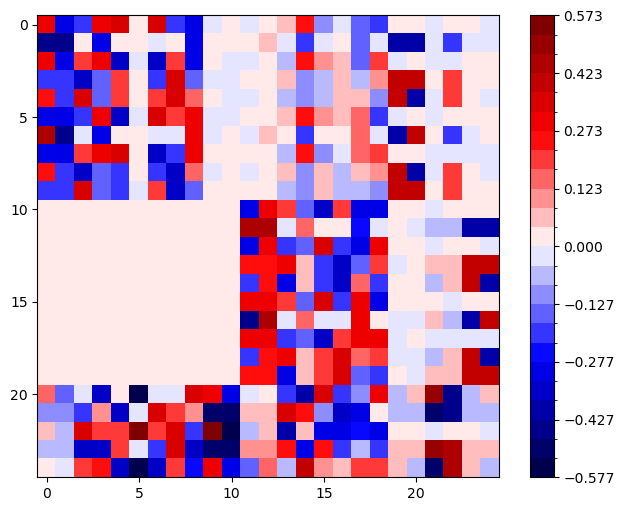

In [269]:
eigenvalues, eigenvectors = huckel_energy(matrix_q11)
plt.figure(figsize=((8,6)))
from matplotlib.colors import BoundaryNorm
bounds = np.arange(np.min(eigenvectors),np.max(eigenvectors),.05)
cmap = plt.get_cmap('seismic')
idx=np.searchsorted(bounds,0)
bounds=np.insert(bounds,idx,0)
norm = BoundaryNorm(bounds, cmap.N)
plt.imshow(eigenvectors,interpolation='none',norm=norm,cmap=cmap)
plt.colorbar()
plt.show()

And the result is independent of the specific dye. However, when the connecting chain becomes longer, the trend breaks down slightly - the contibution from the connecting chain is greater.

## Aromatic end group $\Delta E$

Because of the previous result, we also examined the band gap for the aromatic end groups. 

### Matrix

In [270]:
# Huckel matrix napthelene (single)
matrix_nap_sing = np.zeros((11, 11))

In [271]:
# Ring 1
# Atom 0 interaction (Nitrogen)
matrix_nap_sing[0][9] = b
matrix_nap_sing[0][1] = b

# Atom 1 interactions
matrix_nap_sing[1][0] = b
matrix_nap_sing[1][2] = b
matrix_nap_sing[1][6] = b

# Atom 2 interactions
matrix_nap_sing[2][1] = b
matrix_nap_sing[2][3] = b

# Atom 3 interactions
matrix_nap_sing[3][2] = b
matrix_nap_sing[3][4] = b

# Atom 4 interactions
matrix_nap_sing[4][3] = b
matrix_nap_sing[4][5] = b

# Atom 5 interactions
matrix_nap_sing[5][4] = b
matrix_nap_sing[5][6] = b

# Atom 6 interactions
matrix_nap_sing[6][1] = b
matrix_nap_sing[6][5] = b
matrix_nap_sing[6][7] = b

# Atom 7 interaction
matrix_nap_sing[7][6] = b
matrix_nap_sing[7][8] = b

# Atom 8 interaction
matrix_nap_sing[8][7] = b
matrix_nap_sing[8][9] = b

# Atom 9 interaction
matrix_nap_sing[9][0] = b
matrix_nap_sing[9][8] = b

### Lambda

In [272]:
eigenvalues, eigenvectors = huckel_energy(matrix_nap_sing)
print(eigenvalues)

[ 6.31190802  4.43503116  3.57090802  2.741       1.69403116  0.
 -1.69403116 -2.741      -3.57090802 -4.43503116 -6.31190802]


In [273]:
dE_nap =  1.694 * 2 / 6.242e+18 # J
lambda_nap = 6.626e-34 * 2.99e8 / dE_nap
print("Full Huckel Model lambda for aromatic end group is {:.3f} nm".format(lambda_nap * 10**9))

Full Huckel Model lambda for aromatic end group is 365.009 nm


Note that this value is __exactly half__ of the lambda max for all the dyes using the full HMO matrix. This relationship is interesting, but has not been explored further.